In [10]:
!wc -l ../eval/result/*.csv

   10001 ../eval/result/center_miou.csv
   10001 ../eval/result/center_oracle_miou.csv
   10001 ../eval/result/center_oracle_pix_acc.csv
   10001 ../eval/result/center_pix_acc.csv
   10001 ../eval/result/random_miou.csv
   10001 ../eval/result/random_oracle_miou.csv
   10001 ../eval/result/random_oracle_pix_acc.csv
   10001 ../eval/result/random_pix_acc.csv
   80008 total


In [11]:
!wc -l ../train/*.csv

  10001 ../train/v4_miou.csv
  10001 ../train/v4_pix_acc.csv
  10001 ../train/v5_miou.csv
  10001 ../train/v5_pix_acc.csv
  40004 total


In [12]:
!wc -l ../eval/clip_sam_result/*.csv

   9987 ../eval/clip_sam_result/clip_sam_16_miou.csv
   9987 ../eval/clip_sam_result/clip_sam_16_pix_acc.csv
  10001 ../eval/clip_sam_result/clip_sam_32_miou.csv
  10001 ../eval/clip_sam_result/clip_sam_32_pix_acc.csv
  39976 total


In [4]:
models = {
    '1_point': '../eval/result/center_{}.csv',
    '1_point_oracle': '../eval/result/center_oracle_{}.csv',
    '1_point_random': '../eval/result/random_{}.csv',
    '1_point_random_oracle': '../eval/result/random_oracle_{}.csv',
    'linear_probe_v4': '../train/v4_{}.csv',
    # NOTE(jiahang): dropped v5 due to poor performance
    # 'linear_probe_v5': '../train/v5_{}.csv',
    # NOTE(jiahang): dropped clip_sam_16 due to poor performance 
    # 'clip_sam_16': '../eval/clip_sam_result/clip_sam_16_{}.csv',
    'clip_sam_32': '../eval/clip_sam_result/clip_sam_32_{}.csv',
}

In [5]:
import pandas as pd
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'compare mIoU')

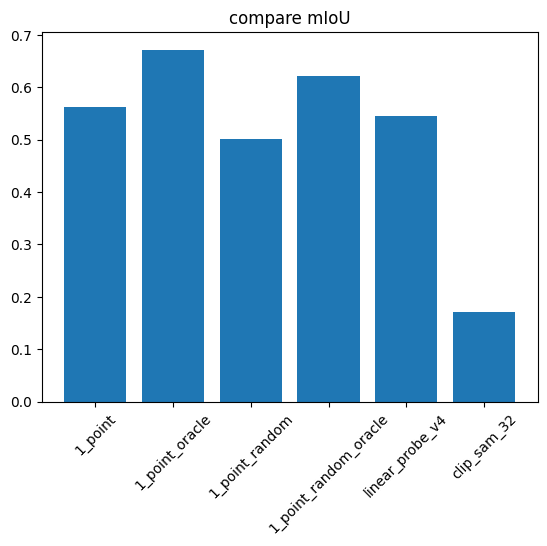

In [6]:
model_names = []
results = []
for model, csv_tmpl in models.items():
    model_names.append(model)
    results.append(pd.read_csv(csv_tmpl.format('miou')).set_index('name').mean(axis=None))
plt.bar(model_names, results)
plt.xticks(rotation=45)
plt.title('compare mIoU')

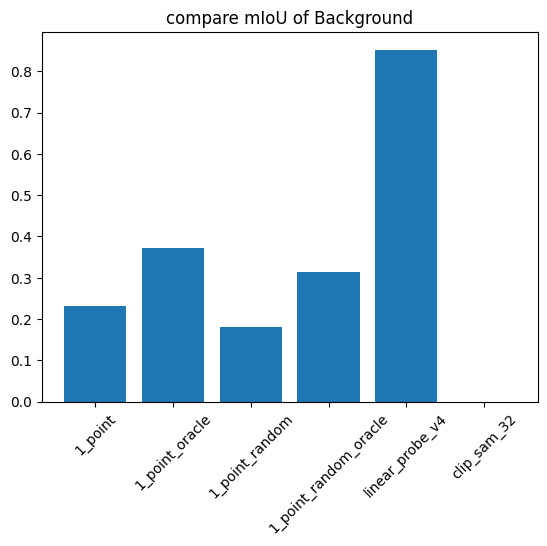

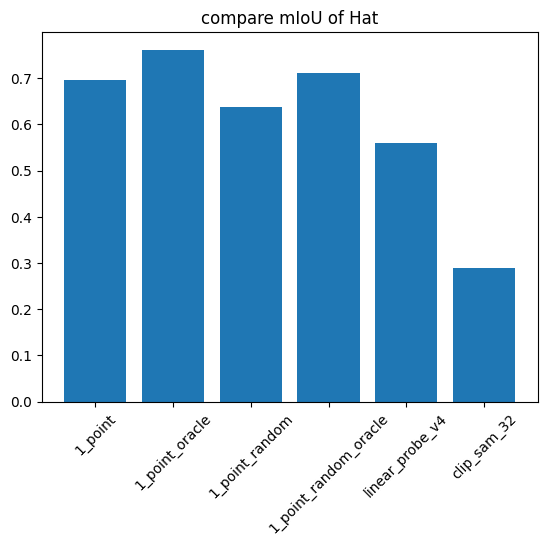

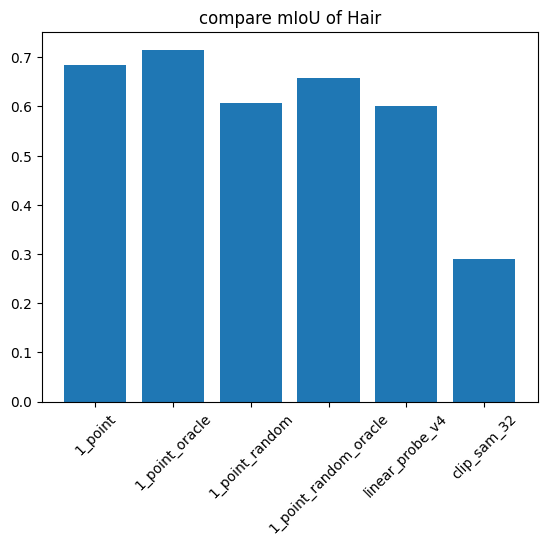

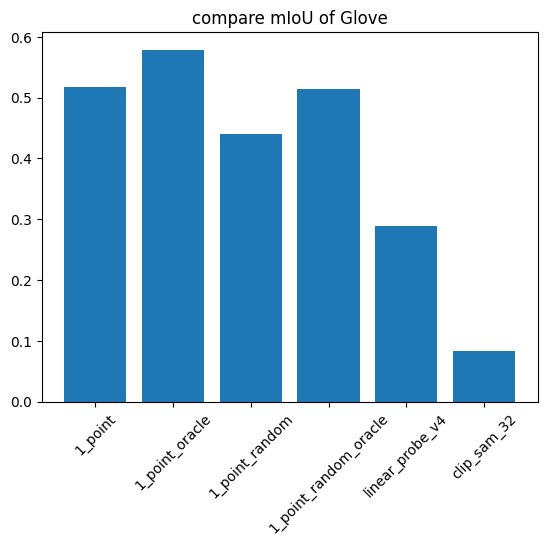

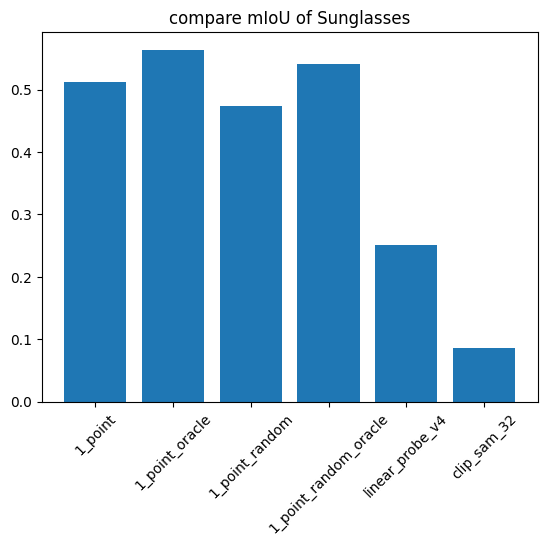

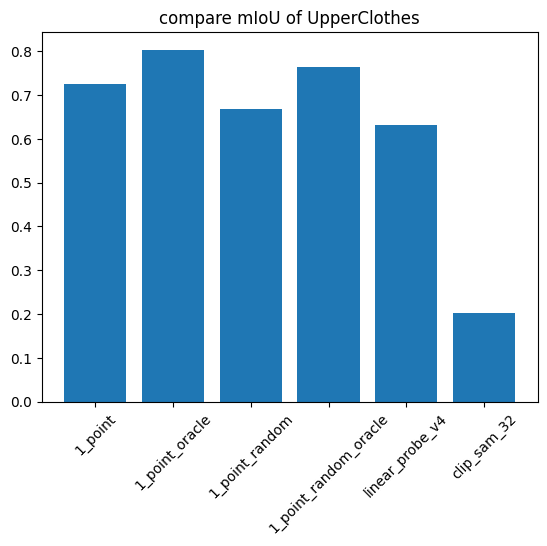

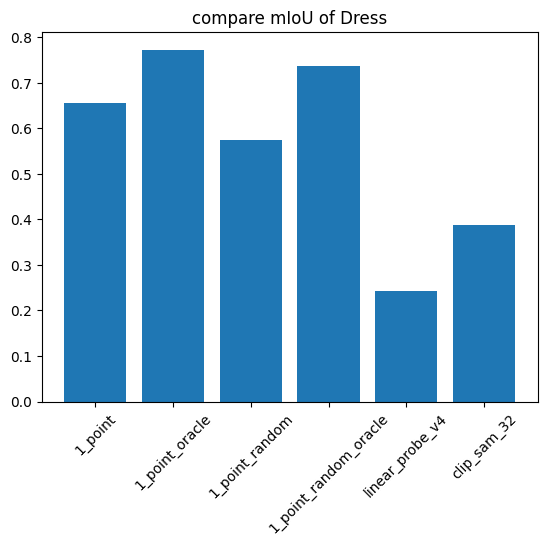

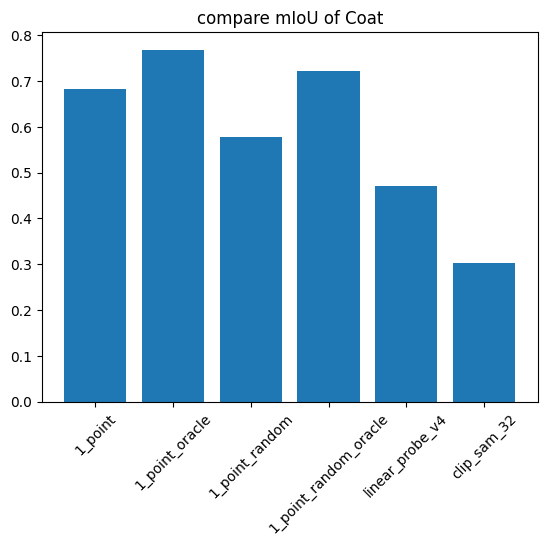

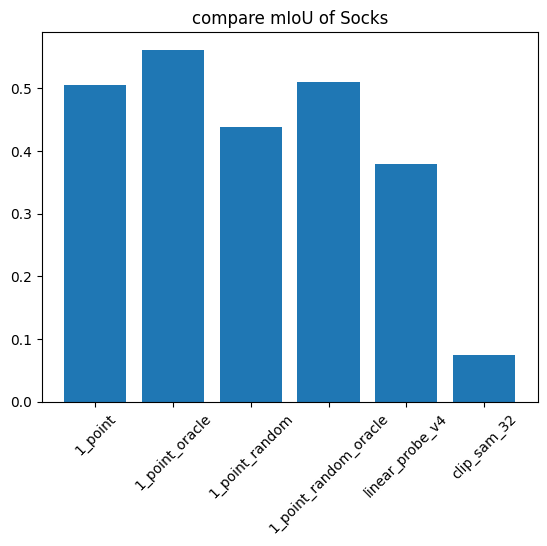

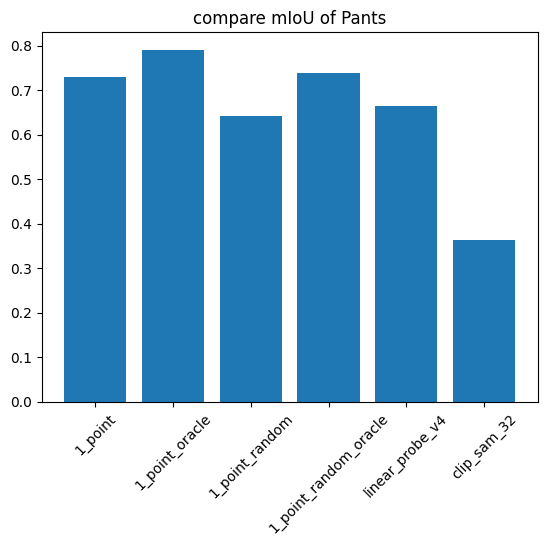

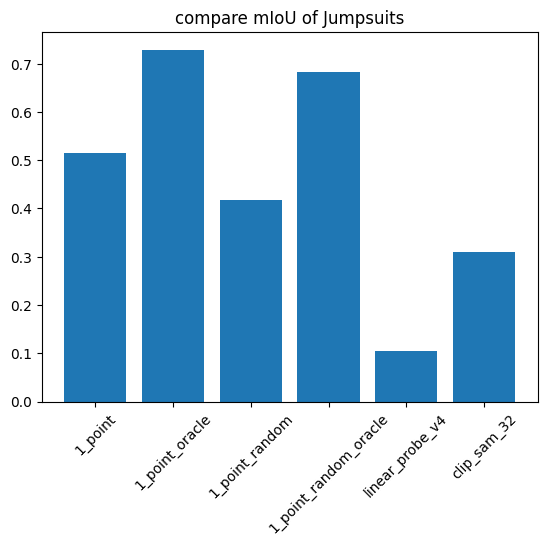

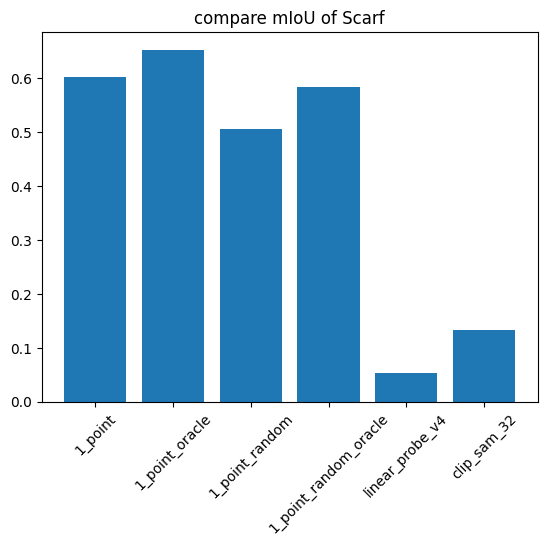

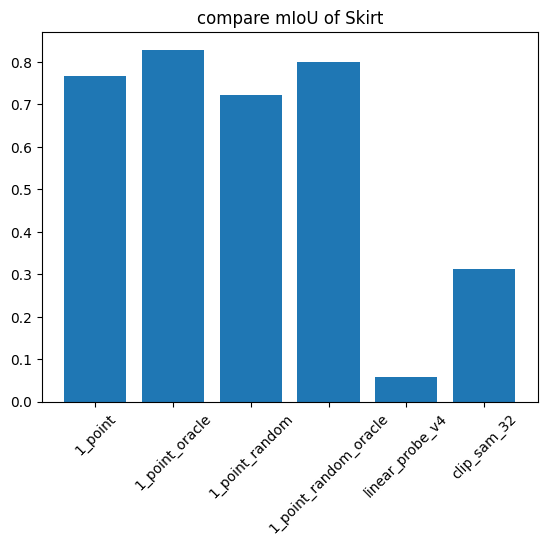

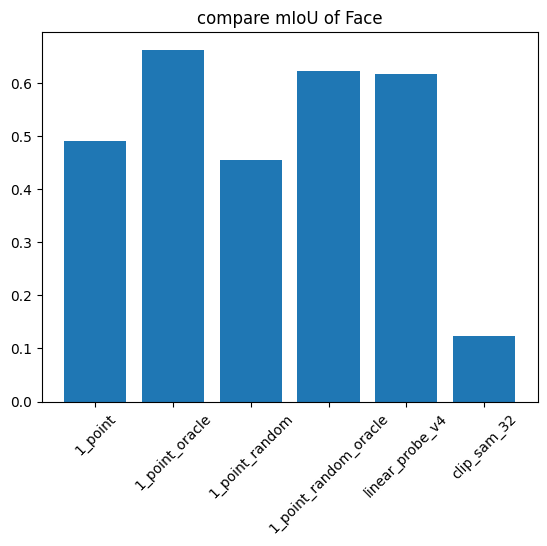

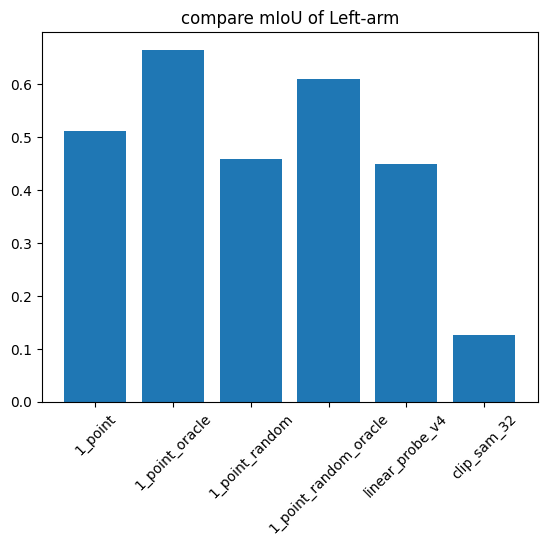

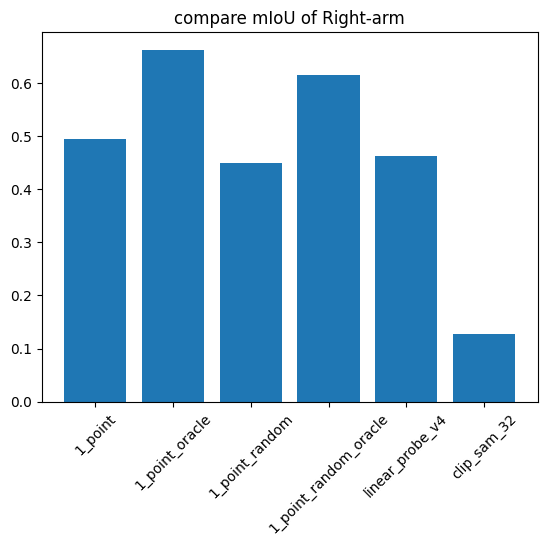

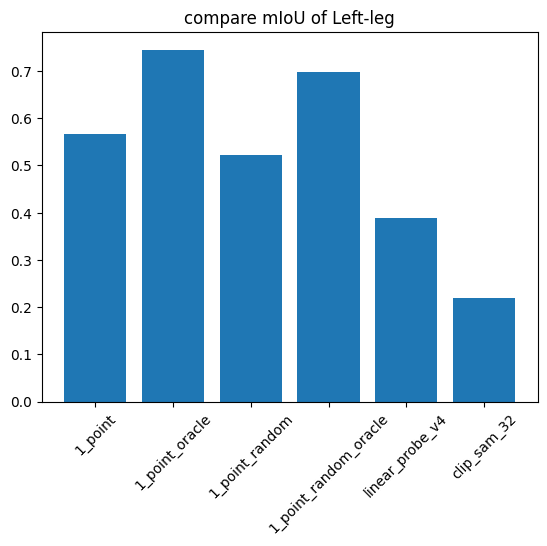

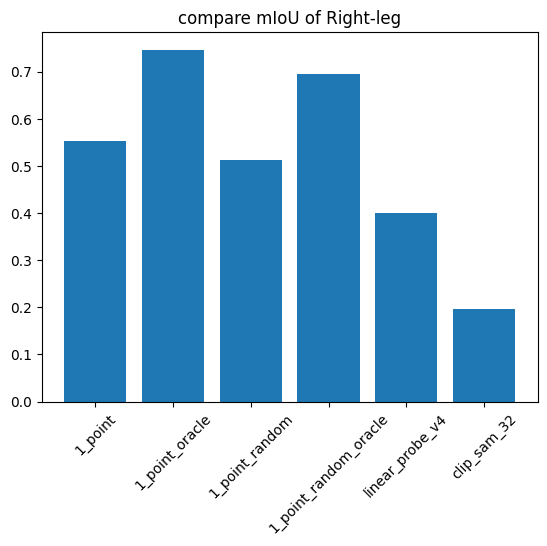

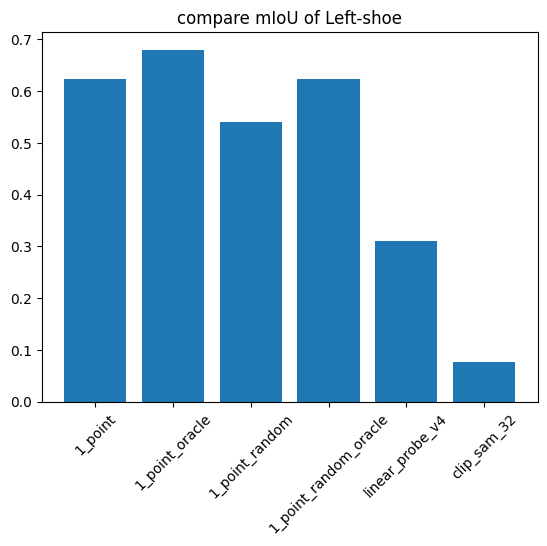

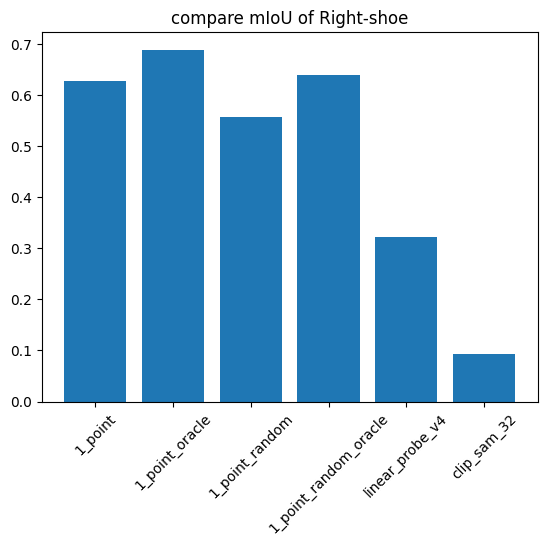

In [7]:
LABELS = """Background
Hat
Hair
Glove
Sunglasses
UpperClothes
Dress
Coat
Socks
Pants
Jumpsuits
Scarf
Skirt
Face
Left-arm
Right-arm
Left-leg
Right-leg
Left-shoe
Right-shoe""".split('\n')
for i, label in enumerate(LABELS):
    model_names = []
    results = []
    for model, csv_tmpl in models.items():
        model_names.append(model)
        results.append(pd.read_csv(csv_tmpl.format('miou')).set_index('name')[label].mean())
    plt.figure()
    plt.bar(model_names, results)
    plt.xticks(rotation=45)
    plt.title(f'compare mIoU of {label}')